In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
df = pd.read_csv(r"C:\Users\nitis\Analysis_Project\laptop_price_prediction\laptop_prices.csv")

In [3]:
# Initial exploration
print(df.head())
print(df.info())
print(df.describe())

  Company      Product   TypeName  Inches  Ram     OS  Weight  Price_euros  \
0   Apple  MacBook Pro  Ultrabook    13.3    8  macOS    1.37      1339.69   
1   Apple  Macbook Air  Ultrabook    13.3    8  macOS    1.34       898.94   
2      HP       250 G6   Notebook    15.6    8  No OS    1.86       575.00   
3   Apple  MacBook Pro  Ultrabook    15.4   16  macOS    1.83      2537.45   
4   Apple  MacBook Pro  Ultrabook    13.3    8  macOS    1.37      1803.60   

     Screen  ScreenW  ...  RetinaDisplay CPU_company CPU_freq      CPU_model  \
0  Standard     2560  ...            Yes       Intel      2.3        Core i5   
1  Standard     1440  ...             No       Intel      1.8        Core i5   
2   Full HD     1920  ...             No       Intel      2.5  Core i5 7200U   
3  Standard     2880  ...            Yes       Intel      2.7        Core i7   
4  Standard     2560  ...            Yes       Intel      3.1        Core i5   

  PrimaryStorage  SecondaryStorage PrimaryStorageT

In [4]:
# Check for missing values
print(df.isnull().sum())

Company                 0
Product                 0
TypeName                0
Inches                  0
Ram                     0
OS                      0
Weight                  0
Price_euros             0
Screen                  0
ScreenW                 0
ScreenH                 0
Touchscreen             0
IPSpanel                0
RetinaDisplay           0
CPU_company             0
CPU_freq                0
CPU_model               0
PrimaryStorage          0
SecondaryStorage        0
PrimaryStorageType      0
SecondaryStorageType    0
GPU_company             0
GPU_model               0
dtype: int64


<Axes: xlabel='Company'>

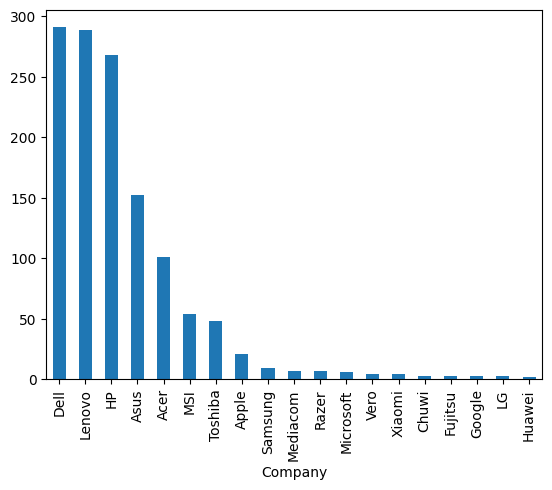

In [5]:
df['Company'].value_counts().plot(kind = 'bar')

<Axes: xlabel='OS'>

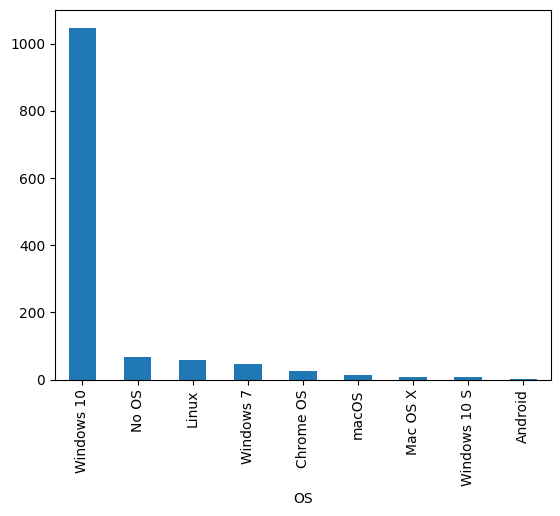

In [7]:
df['OS'].value_counts().plot(kind = 'bar' , x = df['OS'])

<Axes: title={'center': 'TouchScreen'}, ylabel='count'>

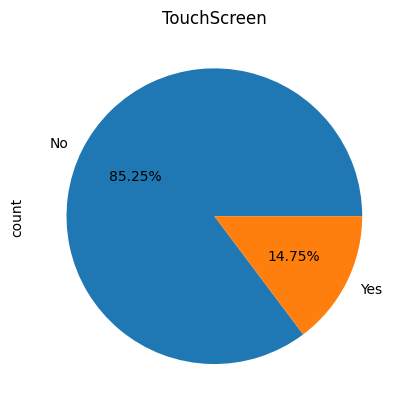

In [8]:
df['Touchscreen'].value_counts().plot(kind = 'pie', autopct =
'%.2f%%' , title = 'TouchScreen')

<Axes: xlabel='Ram'>

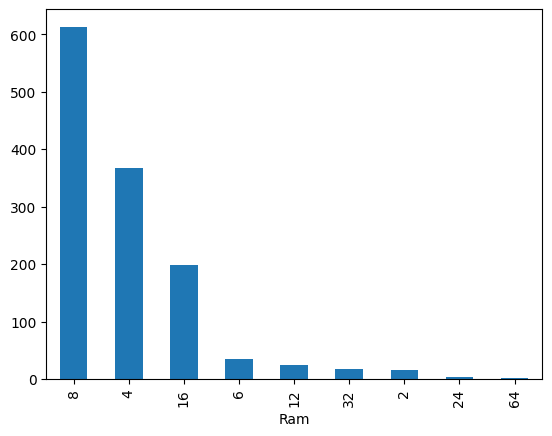

In [9]:
df['Ram'].value_counts().plot(kind = 'bar')

<Axes: title={'center': 'CPU_Company'}, ylabel='count'>

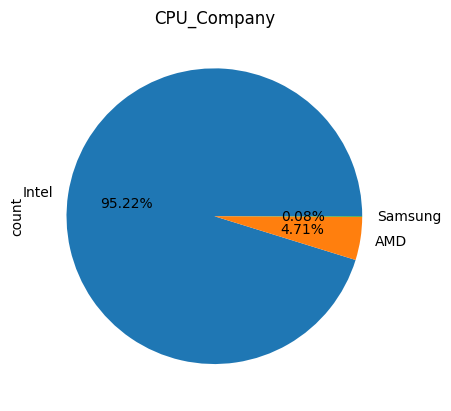

In [10]:
df['CPU_company'].value_counts().plot(kind = 'pie' , autopct
= '%.2f%%', title = 'CPU_Company')

<Axes: title={'center': 'GPU_Company'}, ylabel='count'>

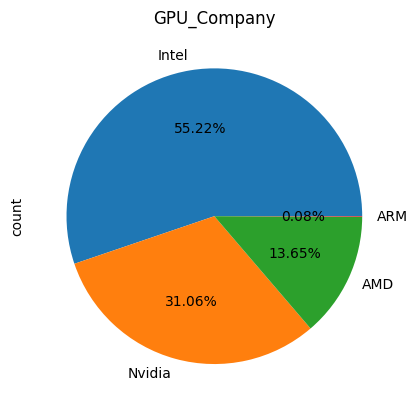

In [11]:
df['GPU_company'].value_counts().plot(kind = 'pie' , autopct
= '%.2f%%', title = 'GPU_Company')

<Axes: ylabel='count'>

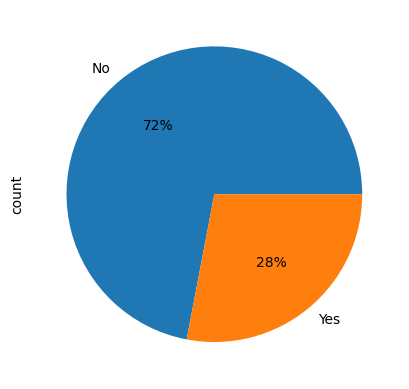

In [12]:
df['IPSpanel'].value_counts().plot(kind = 'pie' , autopct =
'%.f%%')

<Axes: xlabel='Inches'>

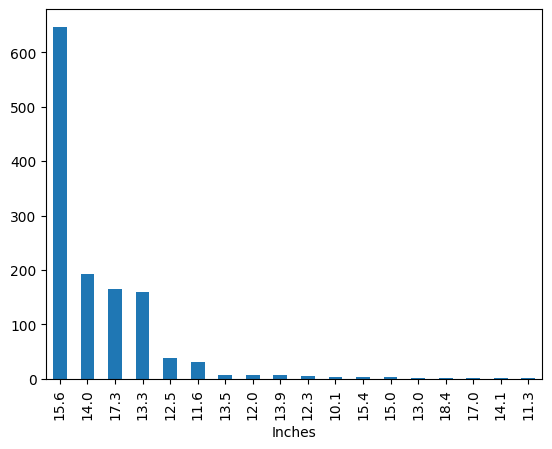

In [13]:
df['Inches'].value_counts().plot(kind = 'bar')

<Axes: ylabel='count'>

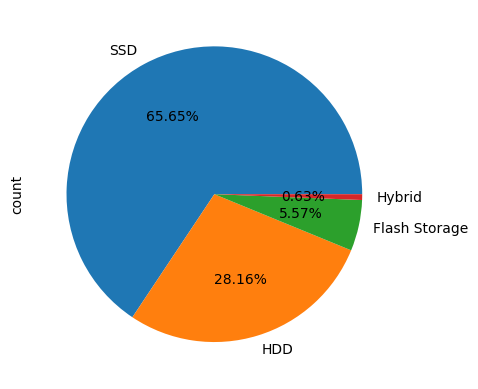

In [14]:
df['PrimaryStorageType'].value_counts().plot(kind = 'pie' ,
autopct = '%.2f%%')

<Axes: xlabel='Screen'>

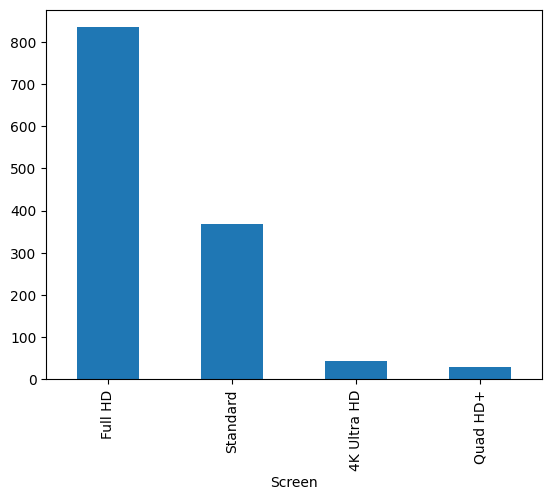

In [15]:
df['Screen'].value_counts().plot(kind = 'bar')

<Axes: xlabel='SecondaryStorageType'>

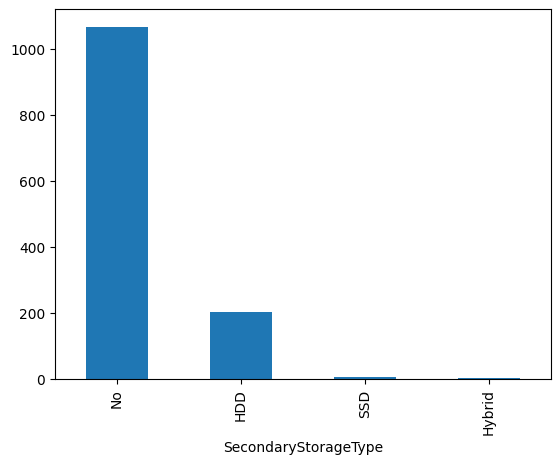

In [16]:
df['SecondaryStorageType'].value_counts().plot(kind = 'bar')

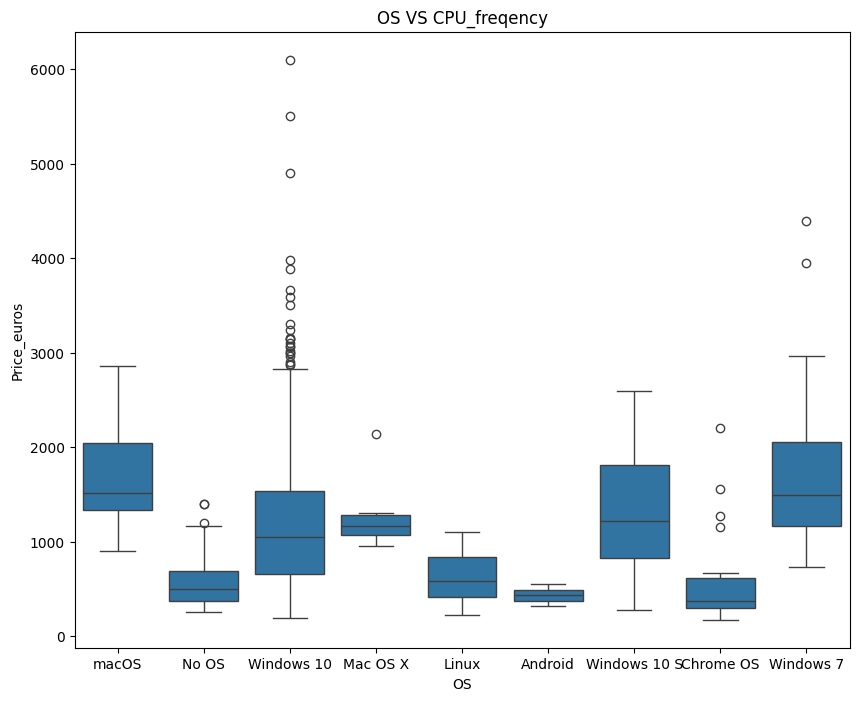

In [17]:
plt.figure(figsize = (10,8))
sns.boxplot(x = df['OS'], y= df['Price_euros'])
plt.title('OS VS CPU_freqency')
plt.show()

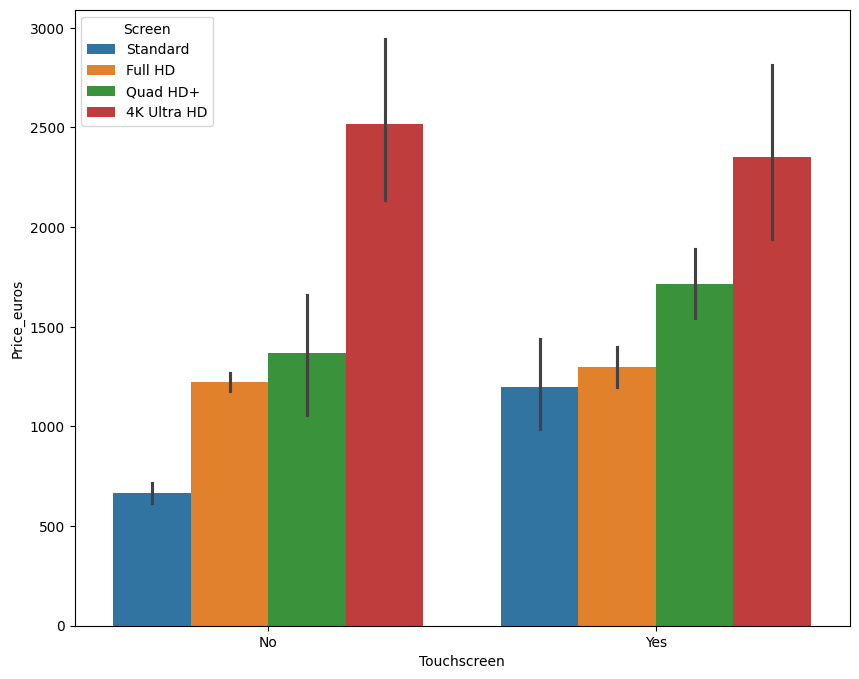

In [18]:
plt.figure(figsize = (10,8))
sns.barplot(x = df['Touchscreen'], y= df['Price_euros'] ,
hue = df['Screen'])
plt.show()

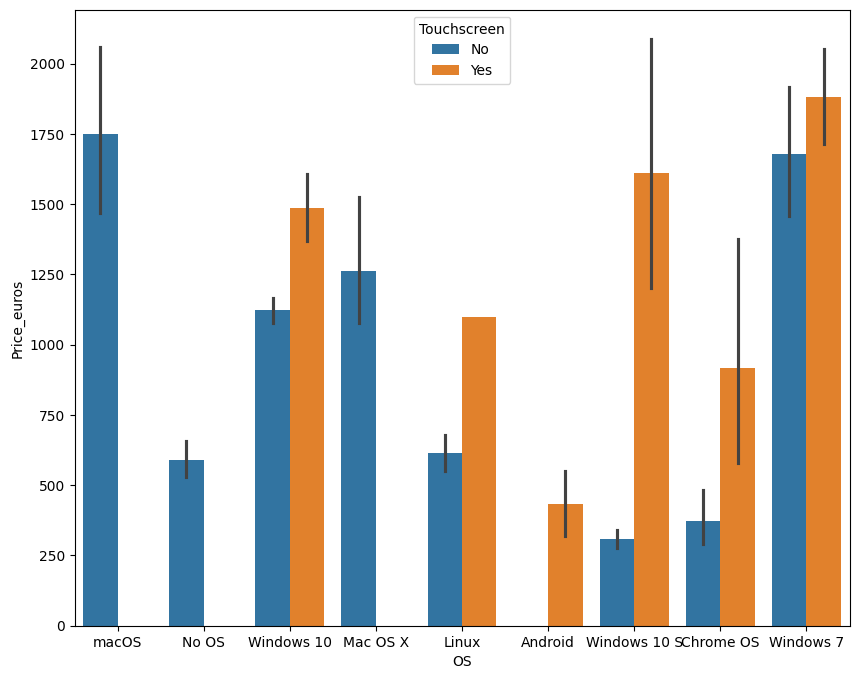

In [19]:
plt.figure(figsize = (10,8))
sns.barplot(x = df['OS'], y= df['Price_euros'] , hue =

df['Touchscreen'])
plt.show()

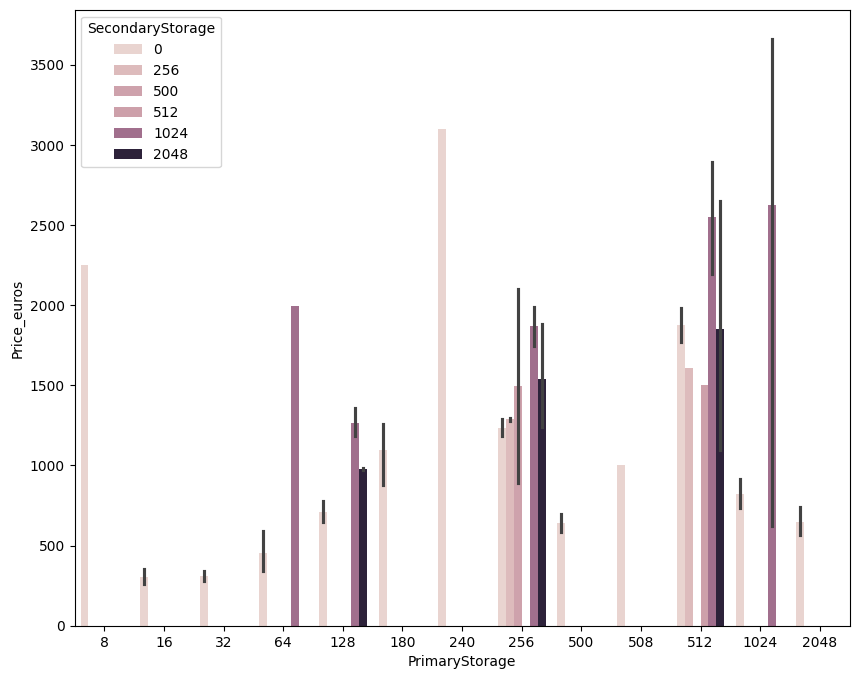

In [20]:
plt.figure(figsize = (10,8))
sns.barplot(x = df['PrimaryStorage'], y= df['Price_euros']
, hue = df['SecondaryStorage'])
plt.show()

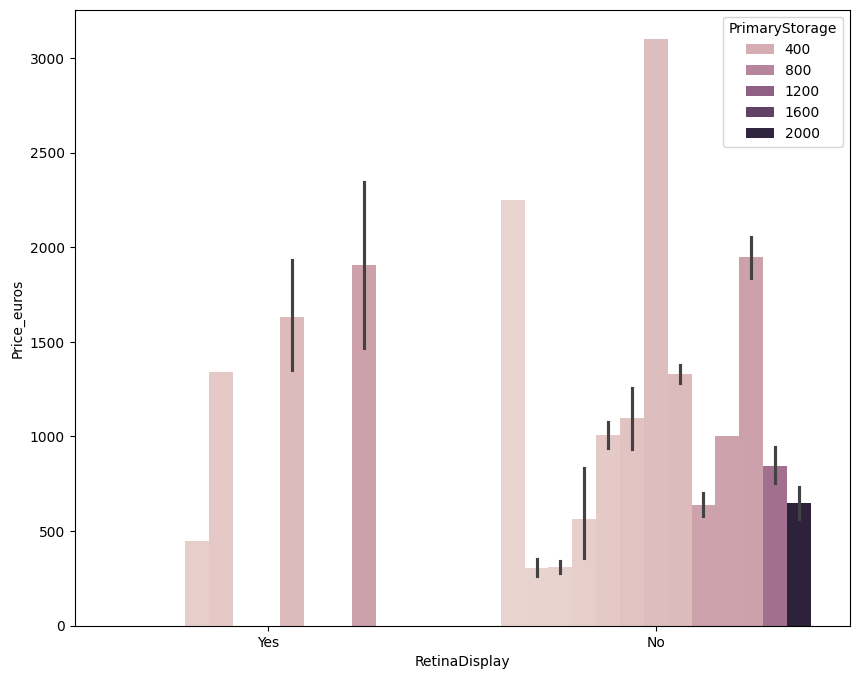

In [21]:
plt.figure(figsize = (10,8))
sns.barplot(x = df['RetinaDisplay'], y= df['Price_euros'],
hue = df['PrimaryStorage'])
plt.show()

<Axes: xlabel='CPU_freq', ylabel='Ram'>

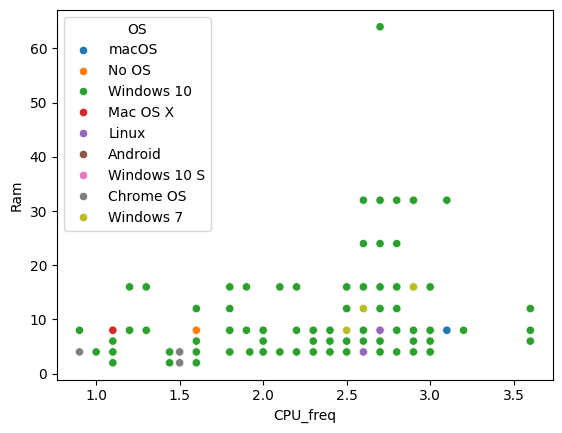

In [26]:
sns.scatterplot(data = df , x= df['CPU_freq'], y =
df['Ram'], hue = df['OS'])

<Axes: xlabel='CPU_freq', ylabel='Ram'>

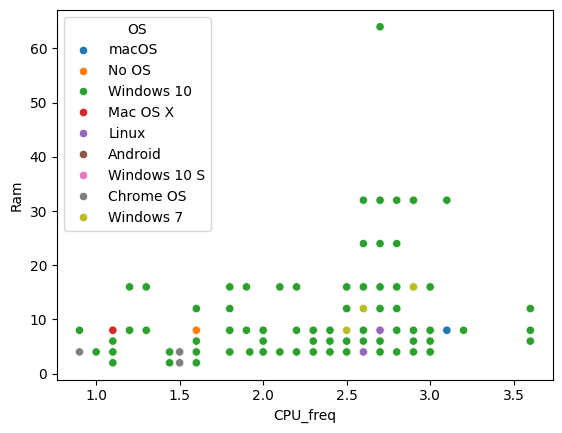

In [25]:
sns.scatterplot(data = df , x= df['CPU_freq'], y =
df['Ram'], hue = df['OS'])

In [24]:
#  Basic cleaning
# Convert Price_euros to numeric (just in case)
df['Price_euros'] = pd.to_numeric(df['Price_euros'], errors='coerce')

In [6]:
# Drop any rows with missing price
df = df.dropna(subset=['Price_euros'])

In [7]:
# Save cleaned data
df.to_csv('cleaned_laptop_prices.csv', index=False)

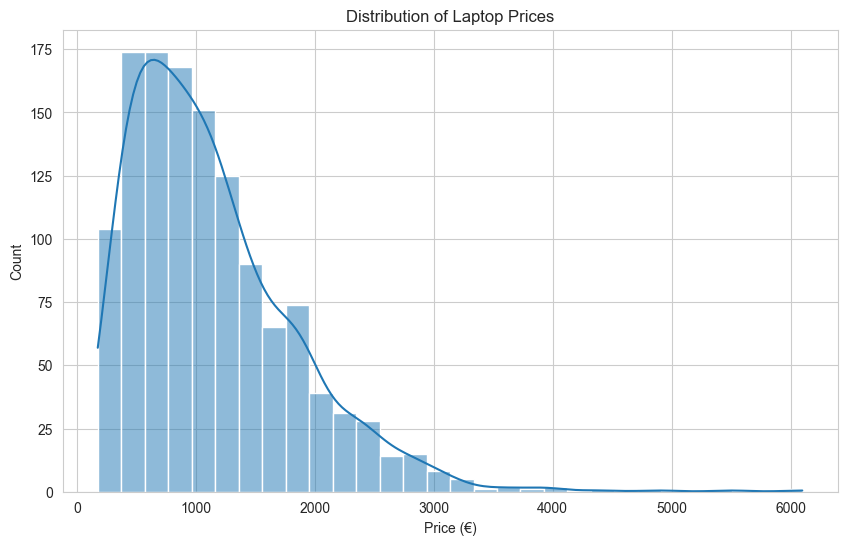

In [8]:
# Set style
sns.set_style('whitegrid')

# Price distribution
plt.figure(figsize=(10,6))
sns.histplot(df['Price_euros'], bins=30, kde=True)
plt.title('Distribution of Laptop Prices')
plt.xlabel('Price (€)')
plt.ylabel('Count')
plt.show()

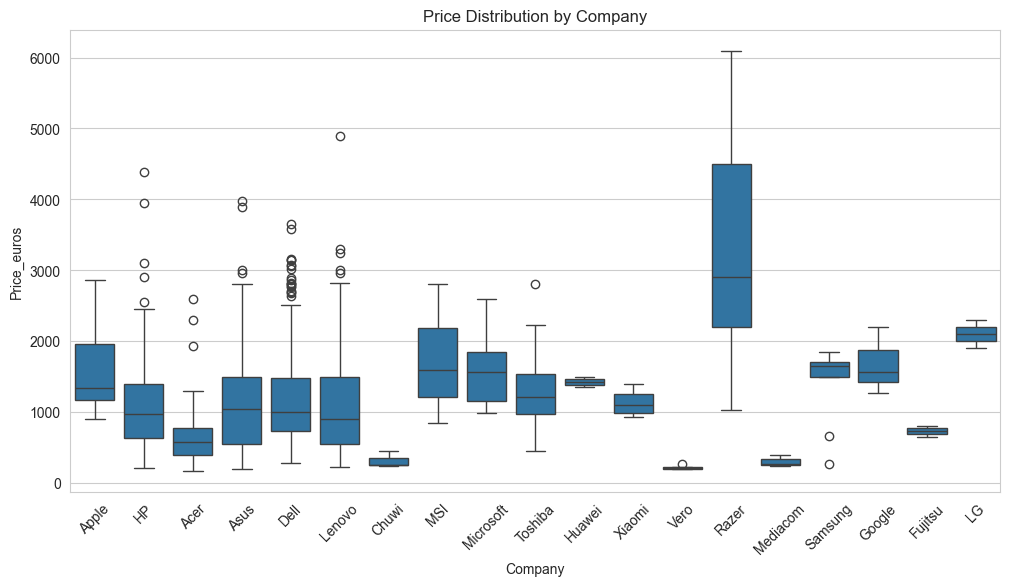

In [9]:
# Price by company
plt.figure(figsize=(12,6))
sns.boxplot(x='Company', y='Price_euros', data=df)
plt.xticks(rotation=45)
plt.title('Price Distribution by Company')
plt.show()

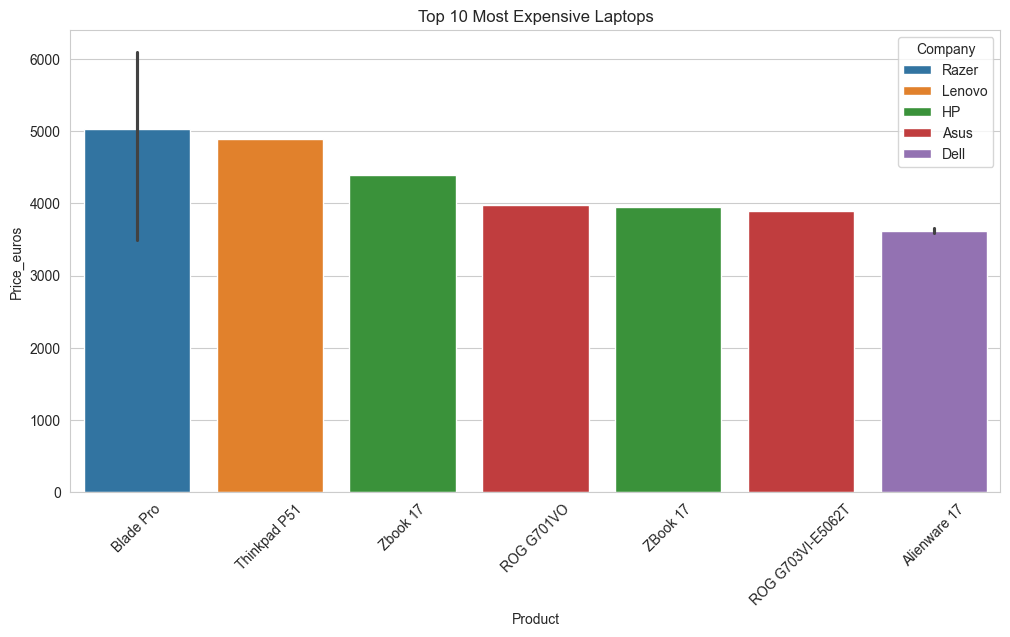

In [10]:
# Top 10 most expensive laptops
top_10 = df.sort_values('Price_euros', ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x='Product', y='Price_euros', hue='Company', data=top_10)
plt.xticks(rotation=45)
plt.title('Top 10 Most Expensive Laptops')
plt.show()

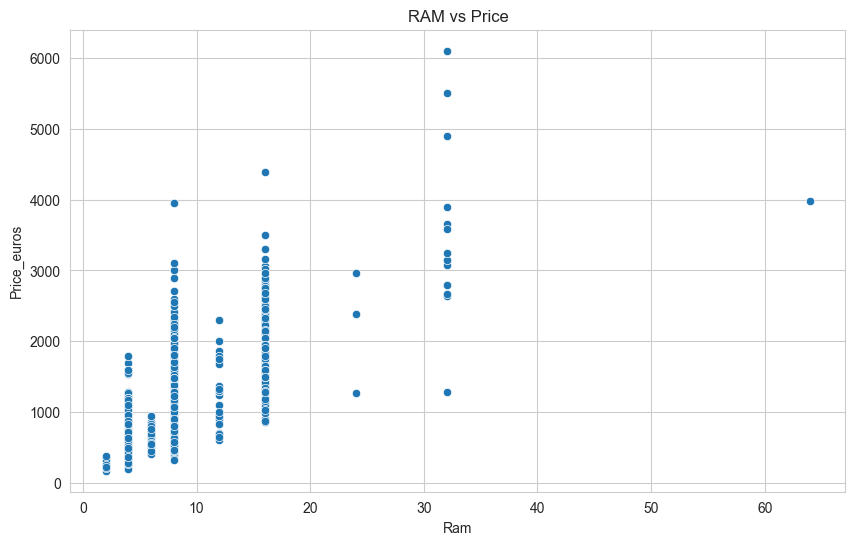

In [11]:
# Correlation between RAM and Price
plt.figure(figsize=(10,6))
sns.scatterplot(x='Ram', y='Price_euros', data=df)
plt.title('RAM vs Price')
plt.show()

#  Feature Engineering and Modeling


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder


In [13]:
# Select features and target
features = ['Company', 'TypeName', 'Inches', 'Ram', 'Weight', 'CPU_company', 'PrimaryStorage', 'GPU_company']
target = 'Price_euros'


In [14]:
# Create a copy for modeling
model_df = df[features + [target]].copy()


In [15]:
# Encode categorical variables
label_encoders = {}
for col in ['Company', 'TypeName', 'CPU_company', 'GPU_company']:
    le = LabelEncoder()
    model_df[col] = le.fit_transform(model_df[col])
    label_encoders[col] = le

In [16]:
# Split data
X = model_df[features]
y = model_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

MAE: 227.59038336371037
R2 Score: 0.7928228099719894


In [17]:
# # Train XGBoost model with Hyperparameter Tuning

# from sklearn.model_selection import RandomizedSearchCV
# from xgboost import XGBRegressor

# xgb_params = {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}
# xgb_grid = RandomizedSearchCV(XGBRegressor(random_state=42), xgb_params, cv=3, scoring='r2', n_iter=10, n_jobs=-1, random_state=42)
# xgb_grid.fit(X_train, y_train)
# xgb_model = xgb_grid.best_estimator_

In [18]:
# Evaluate models
# def evaluate_model(model, X_test, y_test):
#     y_pred = model.predict(X_test)
#     mse = mean_squared_error(y_test, y_pred)
#     r2 = r2_score(y_test, y_pred)
#     return mse, r2

In [19]:
# from sklearn.metrics import mean_squared_error
# xgb_mse, xgb_r2 = evaluate_model(xgb_model, X_test, y_test)

In [20]:
# print(f"XGBoost (Tuned) - MSE: {xgb_mse:.2f}, R2 Score: {xgb_r2:.2f}")
# 

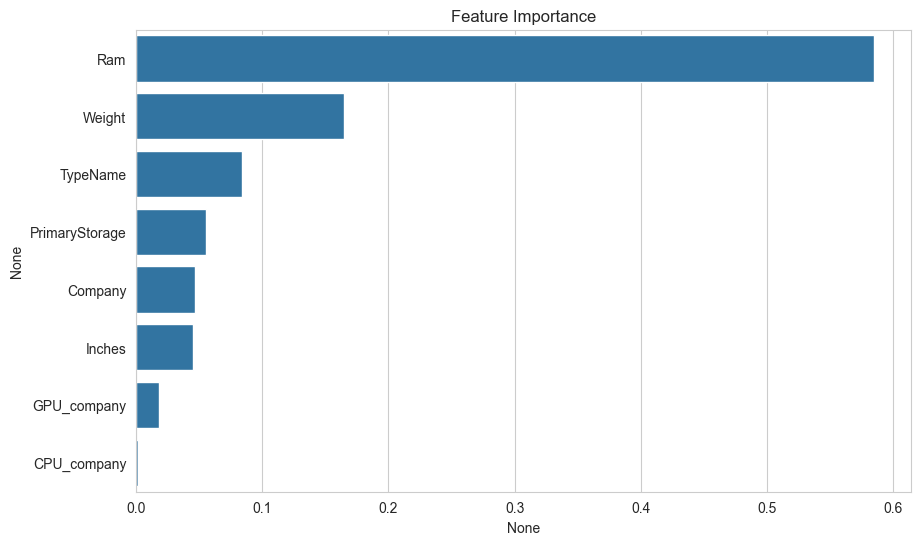

In [21]:
# Feature importance
feature_imp = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title('Feature Importance')
plt.show()

In [22]:
import pickle

# Save the model
with open('laptop_model1.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save the label encoders
with open('label_encoders1.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)